In [87]:
import os
from PIL import Image
import tensorflow as tf

In [196]:
img = Image.open('/Users/tokuo/workspace/yasunaga-lab_practice/tiff/img/demo2.tif')

In [197]:
img.size

(1280, 960)

In [198]:
img.mode

'RGB'

In [199]:
img.format

'TIFF'

In [200]:
img.info

{'compression': 'raw', 'dpi': (120.0, 120.0)}

In [201]:
img.getpixel((0,0))

(164, 191, 219)

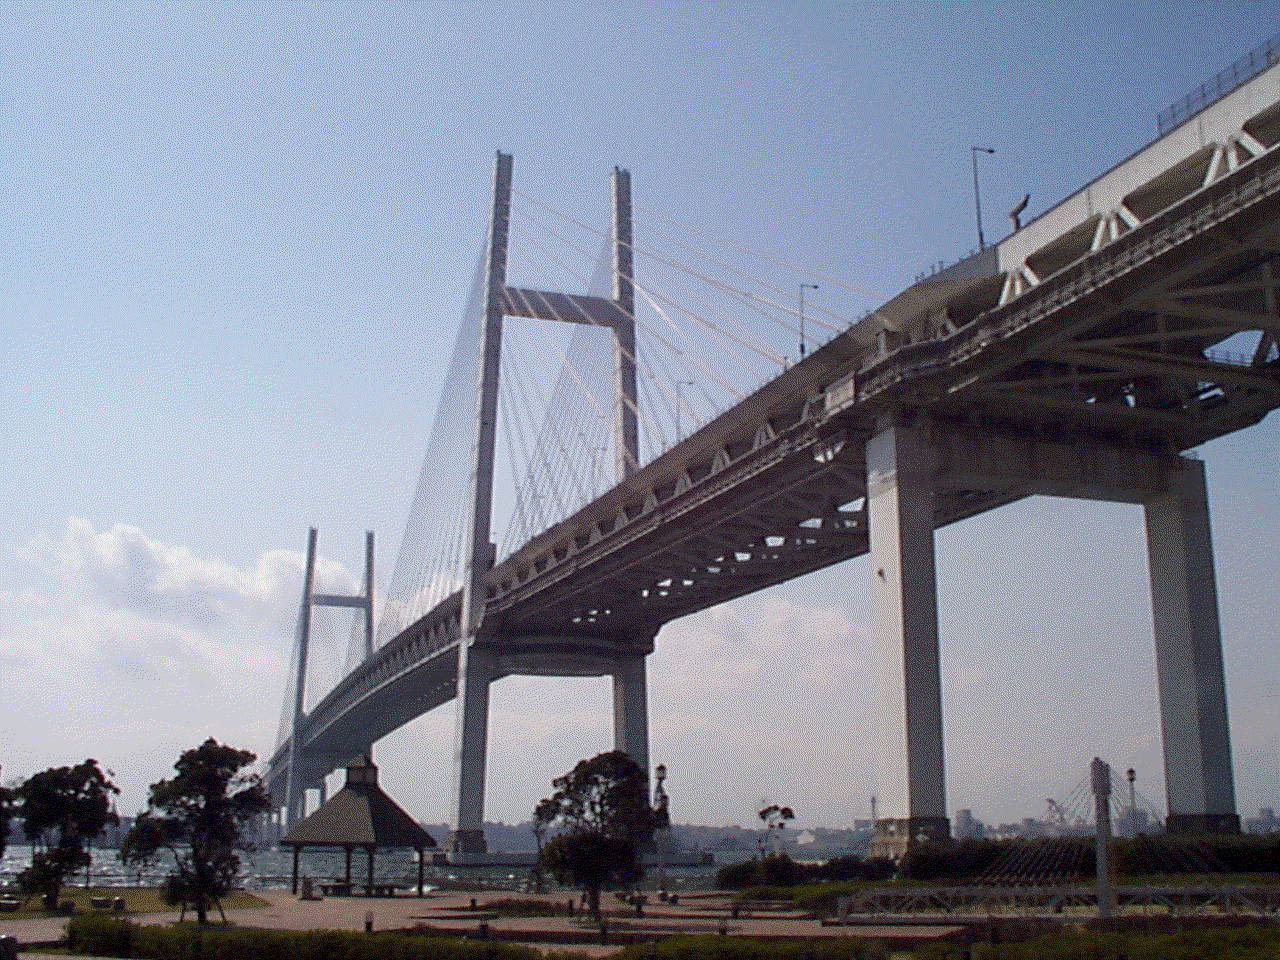

In [206]:
demo = img.convert('P')
demo

In [207]:
demo.getpixel((300,300))

217

In [208]:
demo.mode
demo.size

(1280, 960)

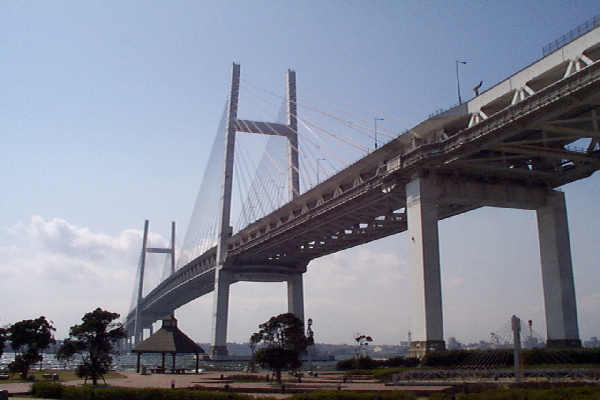

In [242]:
c = (600,400)
img = img.resize(c)
a = [[]]
img

In [210]:
a = demo.size
if a == (1920,1080):
    print("OK")

OK


In [230]:
import glob
b=glob.glob("/Users/tokuo/workspace/yasunaga-lab_practice/tiff/img//*.tif")
b[0] = b[0].split("/")[-1]
b
for f in b:
    print(f)

demo.tif
/Users/tokuo/workspace/yasunaga-lab_practice/tiff/img/demo2.tif


In [252]:
class preparation_tensorflow:
    """essential library list
        os, PIL, tensorflow, glob"""
    def __init__(self):
        self.img = ""
        self.SIZE = ()
        self.MODE = "P"
        self.preX = []
        self.x = []
        self.file_list = []
        
    def init_get(self,tif_path):
        self.img = Image.open(tif_path)
        if self.MODE != self.img.mode:
            self.img = self.img.convert(self.MODE)
        self.SIZE = self.img.size
        for i in range(self.SIZE[0]):
            for j in range(self.SIZE[1]):
                self.preX.append(self.img.getpixel((i,j)))
        self.x.append(self.preX)
        self.preX = []
                
    def get_tiff(self,file_name):
        self.img = Image.open(file_name)
        if self.MODE != self.img.mode:
            self.img = self.img.convert(self.MODE)
        if self.SIZE != self.img.size:
            self.img = self.img.resize(self.SIZE)
        for i in range(self.SIZE[0]):
            for j in range(self.SIZE[1]):
                self.preX.append(self.img.getpixel((i,j)))
        self.x.append(self.preX)
        self.preX = []
                
    def get_in_dir(self,dir_path):
        self.file_list = glob.glob(dir_path + "/*.tif")
        if len(self.x) == 0:
            self.init_get(self.file_list[0])
            del self.file_list[0]
        for f in self.file_list:
            self.get_tiff(f)

In [253]:
tf.Variable(112.5)

<tf.Variable 'Variable_36:0' shape=() dtype=float32_ref>

In [255]:
demo = preparation_tensorflow()
len(demo.x)
demo.get_in_dir("/Users/tokuo/workspace/yasunaga-lab_practice/tiff/img/")
len(demo.x)

2